# ---------------------------------  Diwali_Sales_Analysis  ------------------------------------------

## About Dataset

Description: This dataset contains sales data for a retail store during the Diwali festival period in India. The data includes information on the products sold, their categories, the sales channels, the dates and times of sale, the sale prices, and the quantities sold.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= ' unicode_escape')

In [3]:
print("TOTAL NO. OF ROWS AND COLUMNS: ",df.shape)
df.head(10)

TOTAL NO. OF ROWS AND COLUMNS:  (11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [6]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [9]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# Exploratory Data Analysis

### Gender

Text(0.5, 1.0, 'Total Gender Count')

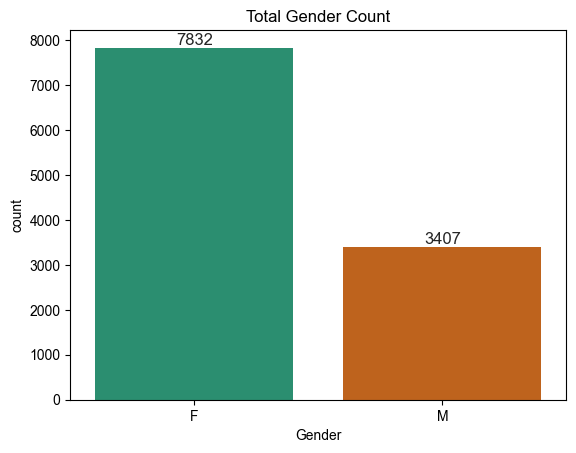

In [10]:
# plotting a bar chart for Gender and it's count
ax=sns.countplot(x='Gender', data=df, palette='Dark2')
sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Total Gender Count')    

<Axes: xlabel='Gender', ylabel='Amount'>

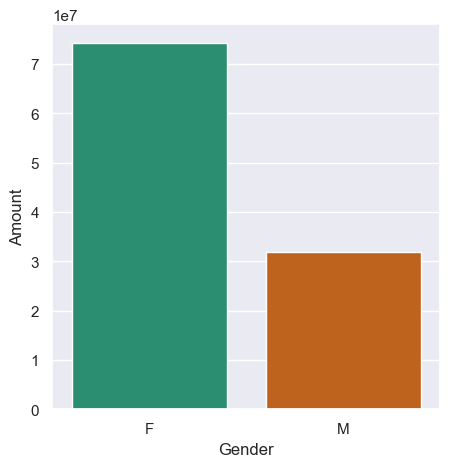

In [11]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette='Dark2')


##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

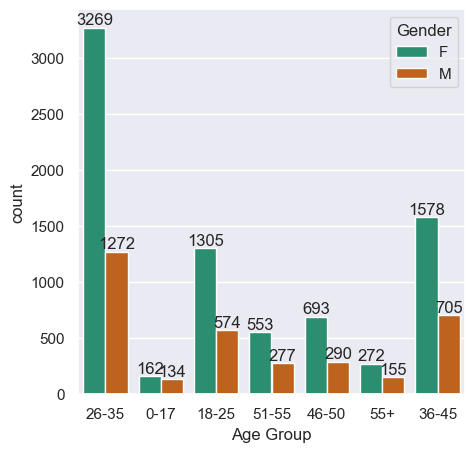

In [12]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette='Dark2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

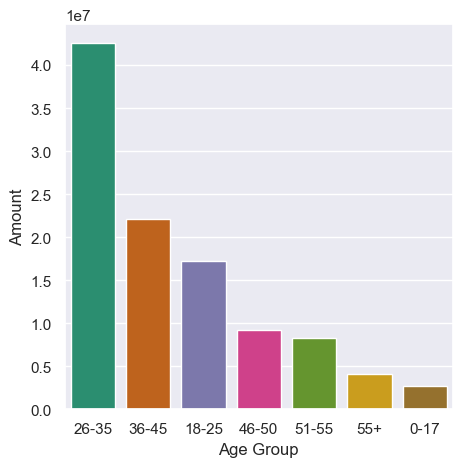

In [13]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette='Dark2')

##### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

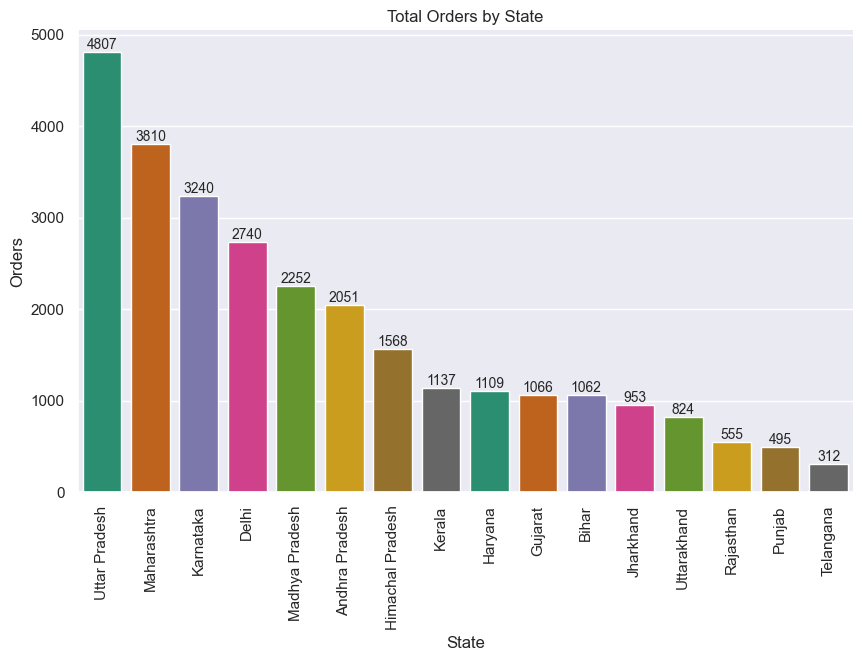

In [14]:
plt.figure(figsize=(10, 6))

sales_state = df.groupby('State')['Orders'].sum().reset_index().sort_values('Orders', ascending=False)

sns.barplot(data=sales_state, x='State', y='Orders', order=sales_state['State'], palette='Dark2')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)

plt.xlabel('State')
plt.ylabel('Orders')

plt.title('Total Orders by State')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

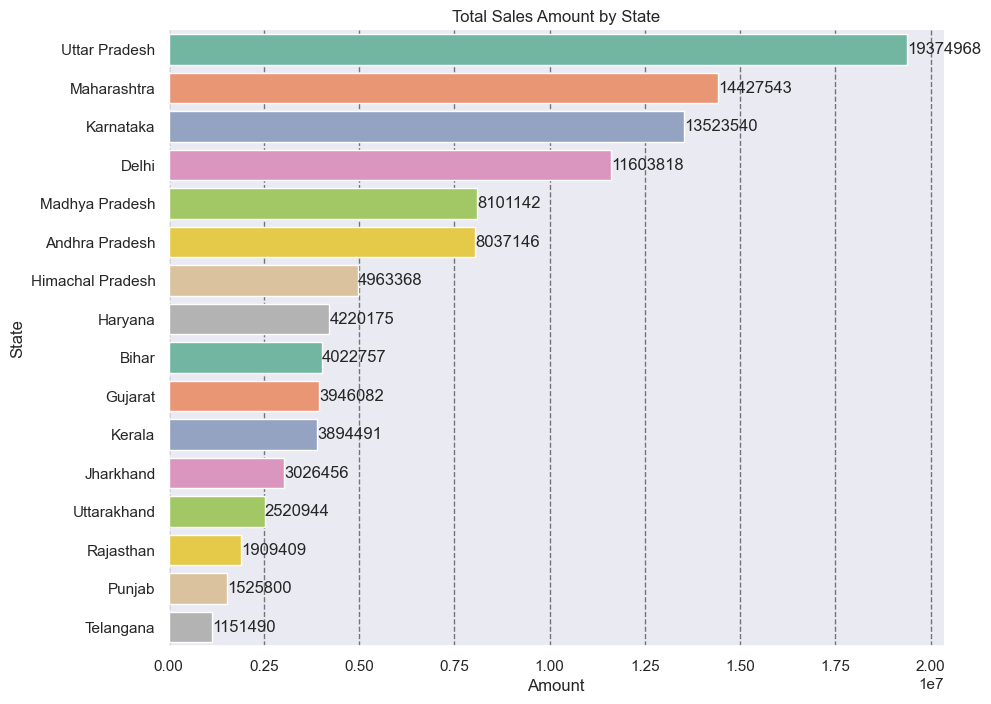

In [15]:
plt.figure(figsize=(10, 8))

sales_state_amount = df.groupby('State')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)

ax = sns.barplot(data=sales_state_amount, y='State', x='Amount', order=sales_state_amount['State'], palette='Set2')

plt.yticks(rotation=0)

plt.xlabel('Amount')
plt.ylabel('State')

plt.title('Total Sales Amount by State')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
    width = p.get_width()
    label_x = p.get_x() + width + 5000
    label_y = p.get_y() + p.get_height() / 2
    value = int(width)
    ax.annotate(f'{value}', (label_x, label_y), ha='left', va='center')

plt.grid(axis='x', color='black', linestyle='--', alpha=0.5)

plt.show()

##### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status


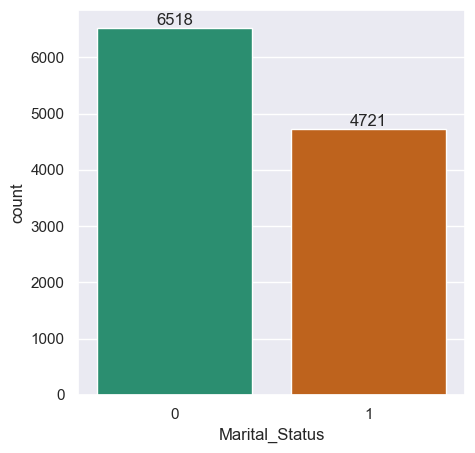

In [16]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette='Dark2')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

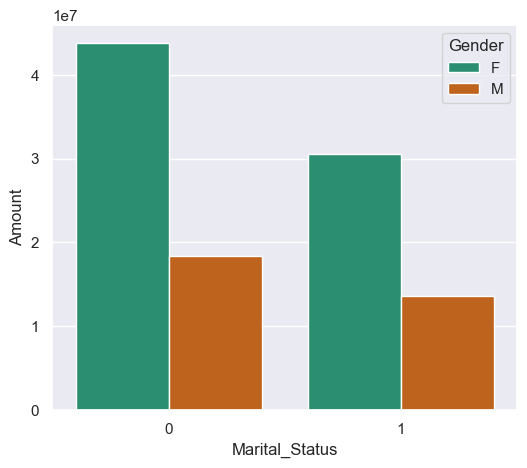

In [17]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)}, palette='Dark2')
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

###### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

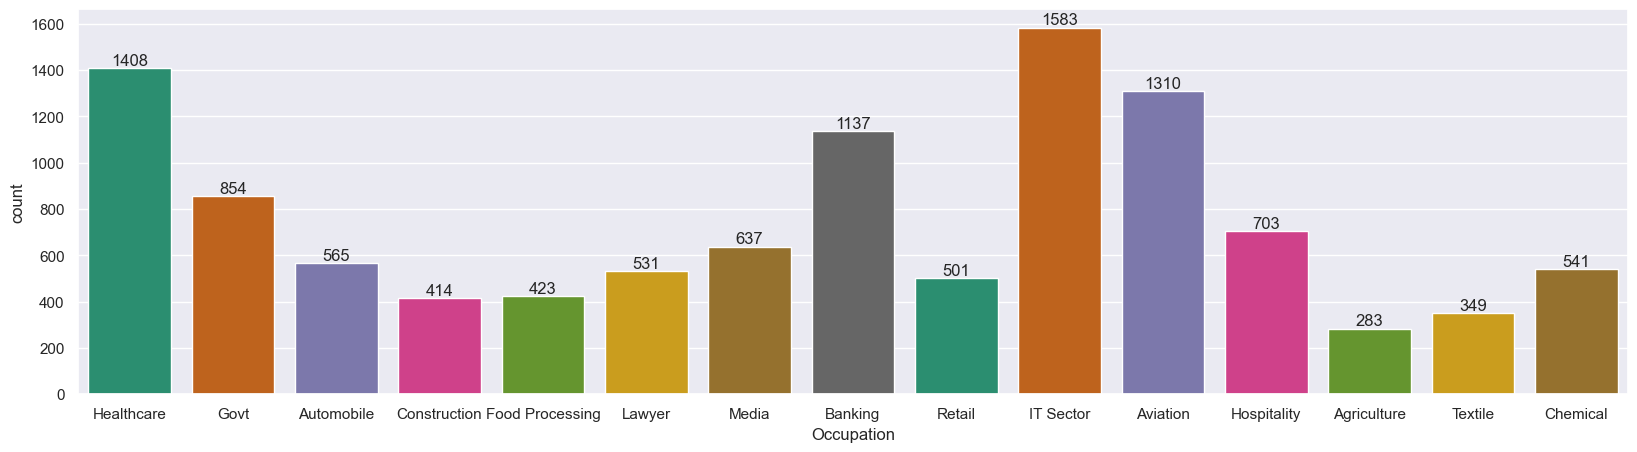

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette='Dark2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

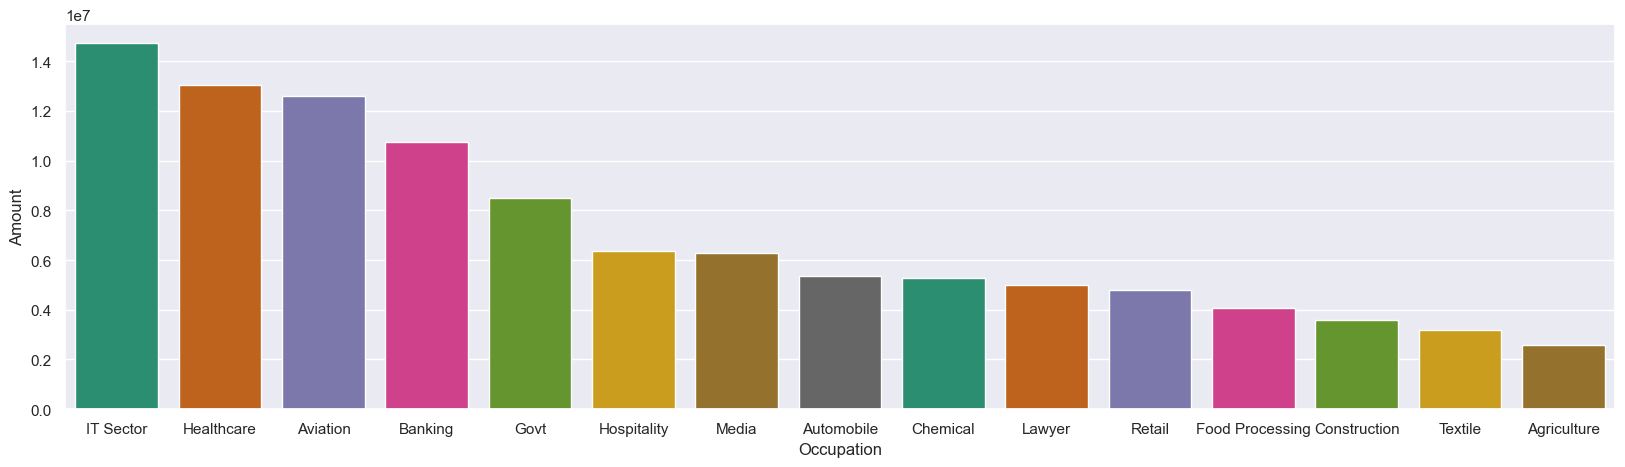

In [19]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette='Dark2')

###### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

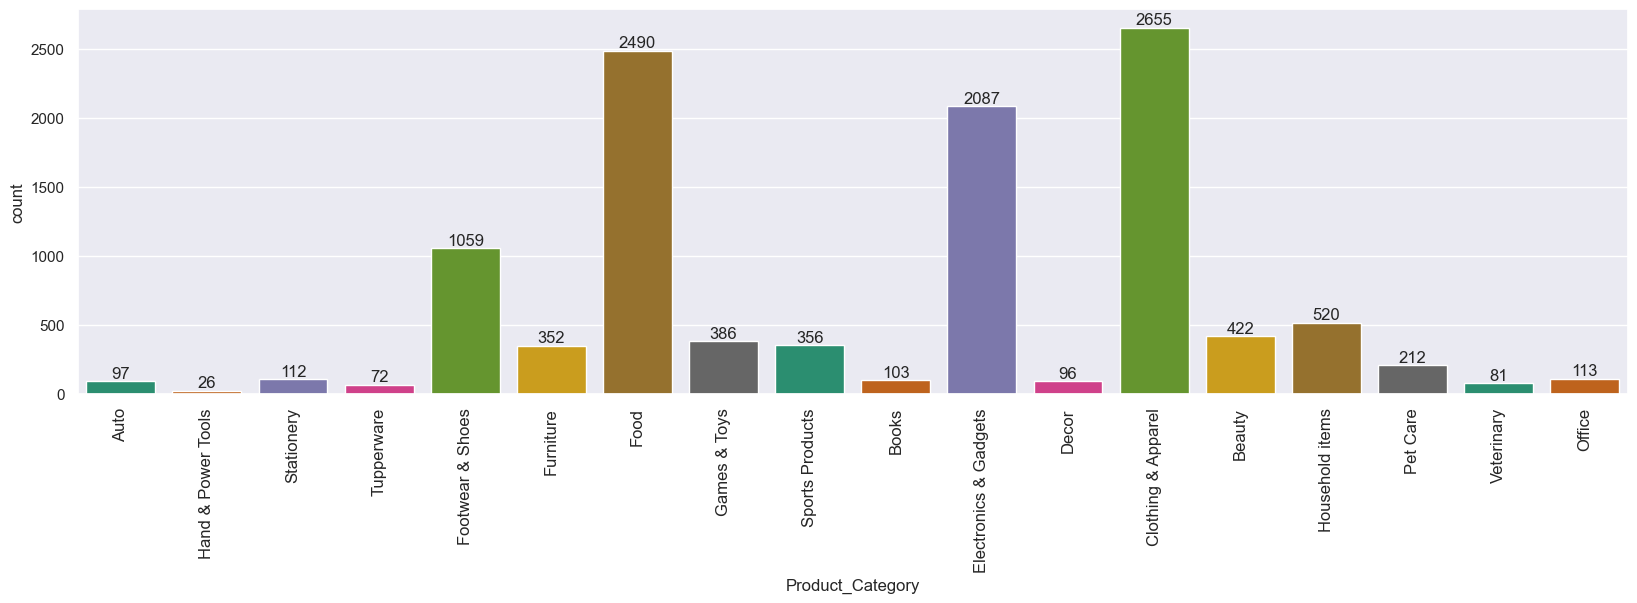

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category', palette='Dark2')
plt.xticks(rotation=90, fontsize=12)
for bars in ax.containers:
    ax.bar_label(bars)

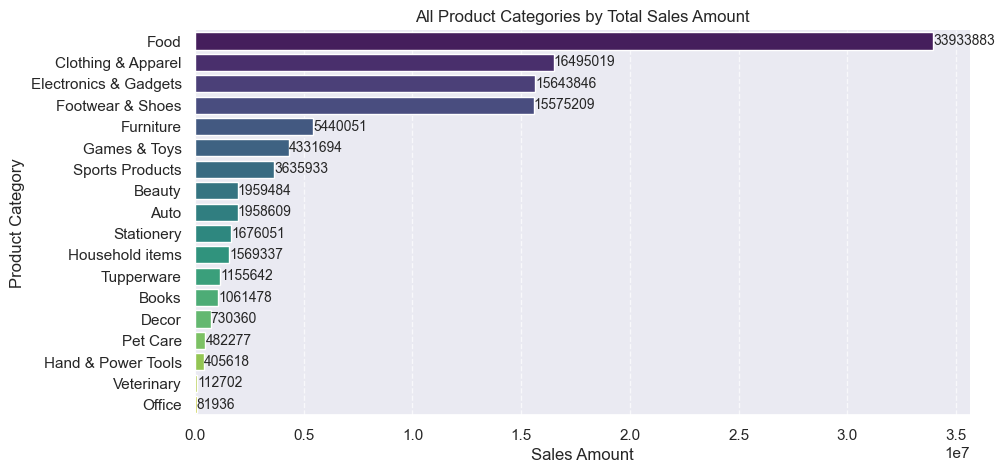

In [21]:
sales_state = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(data=sales_state, x='Amount', y='Product_Category', palette='viridis')

ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10)

plt.title('All Product Categories by Total Sales Amount')

plt.xlabel('Sales Amount')


plt.ylabel('Product Category')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

###### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

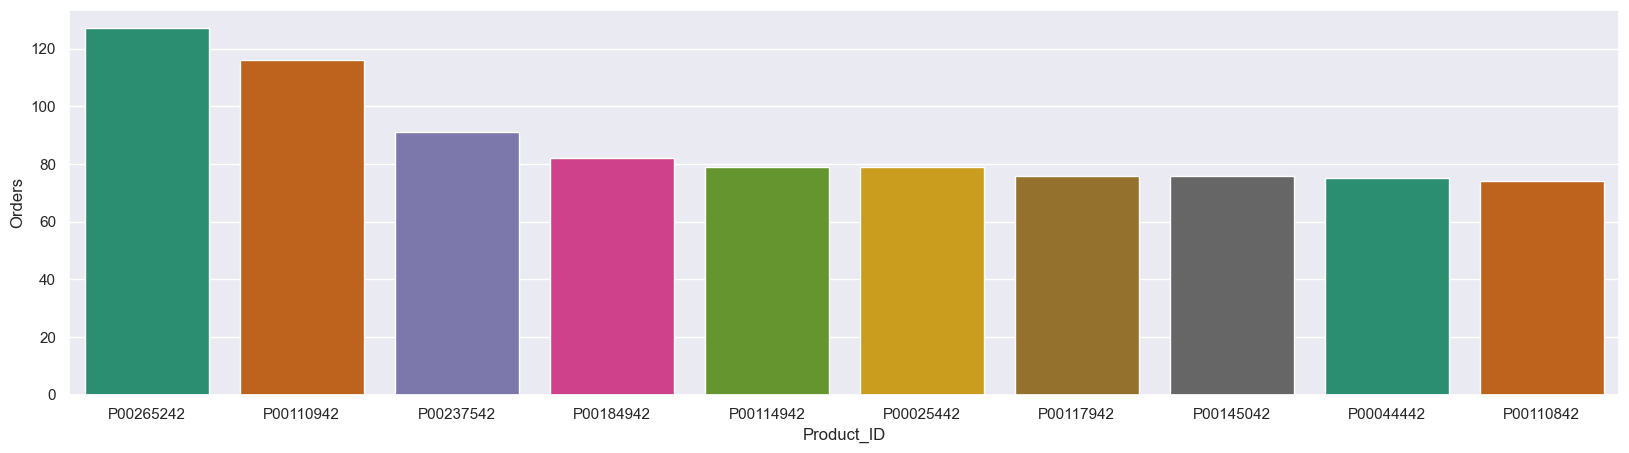

In [22]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette='Dark2')

<Axes: xlabel='Product_ID'>

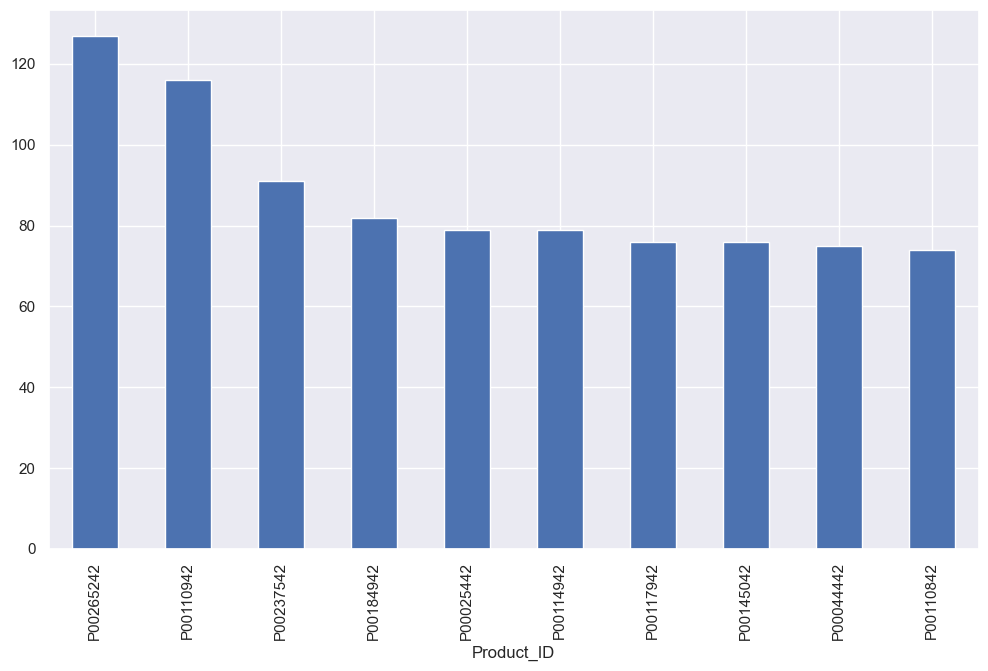

In [23]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

##### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category